<a href="https://colab.research.google.com/github/Rasesh3102/DS-minior-project-May/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("dogs",limit=50,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/dogs


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/ef/14/32/ef1432cf6e4e96b0aa5dbb2662db797e.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://trueworkingdogs.com/wp-content/uploads/20170312_105719.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://trueworkingdogs.com/wp-content/uploads/20180422_150726.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://trueworkingdogs.com/wp-content/uploads/20180422_151229.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://trueworkingdogs.com/wp-content/uploads/20170312_105910.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/8b/7a/09/8b7a09e00936e33bfd441506b6592e45.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://img1.grunge.com/img/gallery/false-facts-about-dogs-you-always-thought-were-true/intro.jpg
[%] File Downloaded !

[%] D

In [40]:
from bing_image_downloader import downloader
downloader.download("elephant",limit=50,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/elephant


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.willflyforfood.net/wp-content/uploads/2018/02/elephant-nature-park-featured-1024x683.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/13/5c/6b/135c6bf0212ab94c7c196a179dff8040--the-elephants.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i2.wp.com/www.mahohboh.org/wp-content/uploads/2018/10/tga-to-great-a-number-1.jpg?resize=800%2C445&amp;ssl=1
[%] File Downloaded !

[%] Downloading Image #4 from https://www.googleapis.com/download/storage/v1/b/sharable_images/o/57459a2e-4c09-40bd-8a40-626ee825c72d_background.png?generation=1595059869448465&amp;alt=media
[!] Issue getting: https://www.googleapis.com/download/storage/v1/b/sharable_images/o/57459a2e-4c09-40bd-8a40-626ee825c72d_background.png?generation=1595059869448465&amp;alt=media
[!] Error:: HTTP Error 400: Bad Request
[%] Downloading

In [39]:
from bing_image_downloader import downloader
downloader.download("Modern Cars",limit=50,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/Modern Cars


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://s24990.pcdn.co/wp-content/uploads/2019/08/2020-cars1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://3.bp.blogspot.com/-itSs0vN44SM/VcPWXI2lgJI/AAAAAAAAGGY/kLjKcR1dlUI/s1600/IMG_0786new.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.carscoops.com/wp-content/uploads/2018/12/e950b438-mazda-rotary-sports-car-.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://images.summitmedia-digital.com/topgear/images/news/0_2016/03/17/camaro_zl1/camaro_zl1-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.carvideos.tv/uploads/video/2017/12/01/hq/h_5a3a794650098.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/lCqg4uZS0n0/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.dragzine.com/image/2014/12/1622500_137540071942076

In [26]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2021-06-24 13:57:33 +00:00)


In [27]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES=['dogs','elephant','Modern Cars']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)
    



time: 49.6 s (started: 2021-06-24 13:57:37 +00:00)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=100)


time: 30.3 ms (started: 2021-06-24 13:58:36 +00:00)


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 34s (started: 2021-06-24 14:08:48 +00:00)


In [43]:
y_pred=clf.predict(x_test)
y_pred

array([2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 2, 1, 1, 1, 0, 2, 2, 2,
       2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 1, 2, 1,
       0])

time: 541 ms (started: 2021-06-24 14:14:23 +00:00)


In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.09 ms (started: 2021-06-24 14:14:29 +00:00)


In [46]:
accuracy_score(y_pred,y_test)

0.6888888888888889

time: 5.08 ms (started: 2021-06-24 14:14:32 +00:00)


In [47]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 79.3 ms (started: 2021-06-24 14:14:37 +00:00)


In [48]:
model=pickle.load(open('img_model.p','rb'))

time: 42.5 ms (started: 2021-06-24 14:14:42 +00:00)


enter your urlhttps://upload.wikimedia.org/wikipedia/commons/thumb/8/84/African_elephant_%28Loxodonta_africana%29_2.jpg/1200px-African_elephant_%28Loxodonta_africana%29_2.jpg
(800, 1200, 3)
PREDICTED OUTPUT:elephant


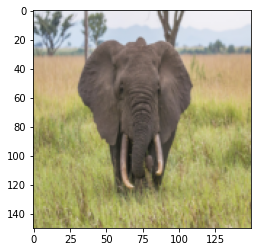

time: 5.12 s (started: 2021-06-24 14:16:13 +00:00)


In [52]:
flat_data=[]
url=input('enter your url')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')
